# Machine Learning and Statistic
***

# Introduction
***

This document have been created to complete Machine Learning and Stadistic tasks assesment using Python and Jupyter Notebook. 

This project will be separated in four different tasks which contain information about the requested assessment and demonstration in each section.

# Task 1: 
***

<b>Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. </b>

We can calculate the square number of a root using Babylonian method, which sometimes is called Hero's method after the first-century Greek mathematician Hero of Alexandria who gave the first explicit description of the method in his work Metrica [1,2]. The formula is  derived from (but predates) Newton–Raphson method and can be represented as below:

\begin{equation}
\ x_{n+1} = \frac{1}{2} \left(x_n + \frac{S}{x_n}\right) \\
\text{ Where x is our initial guess of} \sqrt {S}
\end{equation}



### About Babylonian Method 

The iterative method is called the Babylonian method for finding square roots. It was known to the ancient Babylonians (1500 BC) and Greeks (100 AD) long before Newton invented his general procedure.[3]

Here's how it works. Suppose you are given any positive number $S$. To find the square root of $S$, do the following:

1. Make an initial guess. Guess any positive number $x_{0}$.
2. Improve the guess. Apply the formula 
$x_{1} = (x_{0} + S / x_{0}) / 2$. The average number $x_{1}$ calculated is a better approximation to sqrt($S$). 
3. Iterate until convergence. Apply the formula $x_{n+1} = (x_{n} + S / x_{n}) / 2$ until the process converges. Convergence is achieved when the digits of $x_{n+1}$ and $x_{n}$ agree to as many decimal places as you desire.

### Demonstration

The idea is simple, starting from an arbitrary value of x, and y as 1, we can simply get next approximation of root by finding the average of x and y. Then the y value will be updated with  number / x [1,4].

We have to take in consideration, the floating point result is not represented exactly in Python because computers operate in base 2 (binary) while natural floating point numbers are in base 10 (decimal) [5]. In the example below we can see an example on this.

In [1]:
# Define the function to calculate the square root of a number n

def square_root_2(n): 
  
    # Use x as initial approximation (1)
        x = n 
    # Initialize (2)
        y = 1          
    # e decides the accuracy level 
        e = 0.000001
    # Create condition for accuracy and calculate the better guess (3)
        while(x - y > e): 
    # Get the next approximation for root using average of x and y
            x = (x + y)/2
            y = n / x 
    # Return the (approximate) square root of x.
        return x
     

In [2]:
#Ask for square root of 2 and print 100 decimals [5]. As mentioned the results do not provide all the floating points.
"{0:.100f}".format(square_root_2(2))

'1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000'

In order to <b> produce the square root of 2 with 100 decimal places</b>, the algorithm is similar but in this case will be necessary to multiply by powers of ten to give the result as integers [7, 8].

In this case, in order to get 100 decimal places, the $S$ will be the number we want to find which is 2 multiplied to the order of $ 100^{100} $. 

The result will be the square root of 2 with 101 integers, after that will be necessary return the answer as string and concatenate to see the floating point [8].


In [3]:
def sqrt2():
    
    # Number that you want to find the square root of 
    num = 2
    S = num * 100 ** 100
    # Create condition for accuracy and calculate the better guess (3)
    xn = S//2
    while S - (xn**2) < 0:
    # Get the next approximation for root 
        xn = (xn + S//xn)//2    
    xn = (str(xn))
    # Result as string 
    return(xn[0] + "." + xn[1:])

In [4]:
#The result is the square root of 2 with 100 decimal places
sqrt2()

'1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727'

### References 

1. GeeksforGeeks - Babylonian Method - https://www.geeksforgeeks.org/square-root-of-a-perfect-square/ 
2. Wikipedia -Baylonian Method https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method 
3. Blog SAS - Babylonian Method - https://blogs.sas.com/content/iml/2016/05/16/babylonian-square-roots.html 
4. Github Ian - Playing with Jupiter - https://github.com/ianmcloughlin/playing-with-jupyter/blob/main/playing-with-jupyter.ipynb 
5. GeeksforGeeks - Precision handling Python - https://www.geeksforgeeks.org/precision-handling-python/ 
6. Python Tutorial - Floating Point - https://docs.python.org/3/tutorial/floatingpoint.html
7. Stackoverflow - Create decimal in Python - https://stackoverflow.com/questions/64278117/is-there-a-way-to-create-more-decimal-points-on-python-without-importing-a-libra
8. GMIT - Student Forum Square Root - https://learnonline.gmit.ie/mod/forum/discuss.php?d=6033  


# Task 2: 
***

<b>Use scipy.stats to verify the Chi-squared value of the table below it is approximately 24.6 and and calculate the associated p value.</b>


The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. In order to find Chi-square, we are going to use the SciPy package. SciPy is a Python-based open-source software for mathematics, science, and engineering [7, 8].


|              | A   | B   | C   | D   | Total |
|-------------:|-----|-----|-----|-----|-------|
| White Collar | 90  | 60  | 104 | 95  | 349   |
| Blue Collar  | 30  | 50  | 51  | 20  | 151   |
| No Collar    | 30  | 40  | 45  | 35  | 150   |
|------------- |-----|-----|-----|-----|-------|
| Total        | 150 | 150 | 200 | 150 | 650   |
    
    
 ### About Chi-Square

The Chi-square test for independence is also called Pearson’s chi-square test. Chi-square test for independence is used in science, economics, marketing, or other various fields. There are three ways to use the Chi-square. The Chi-square test for independence shows how two sets of data are independent of each other. Chi-square of the Goodness-of-fit test shows how different your data to the expected value. The test for homogeneity determines if two or more populations have the same distribution of a single categorical variable [8,9,10].

In the section below we will implement an example of Chi-square test for independence which compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.

- A very small chi square test statistic means that your observed data fits your expected data extremely well. In other words, there is a relationship.

- A very large chi square test statistic means that the data does not fit very well. In other words, there isn’t a relationship.

The formula for the chi-square statistic used in the chi square test is:

\begin{equation}
\chi^2=\Sigma\frac{(O-E)^2}{E} \\
\text{where O is the actual value and E is the expected value.}
\end{equation}

A chi-square statistic is one way to show a relationship between two categorical variables. In statistics, there are two types of variables: numerical (countable) variables and non-numerical (categorical) variables. The chi-squared statistic is a single number that tells you how much difference exists between your observed counts and the counts you would expect if there were no relationship at all in the population.

A low value for chi-square means there is a high correlation between your two sets of data. In theory, if your observed and expected values were equal (“no difference”) then chi-square would be zero — an event that is unlikely to happen in real life. Deciding whether a chi-square test statistic is large enough to indicate a statistically significant difference isn’t as easy it seems. It would be nice if we could say a chi-square test statistic >10 means a difference, but unfortunately that isn’t the case.

To evaluate the difference you could use a p-value. First state the null hypothesis and the alternate hypothesis. Then generate a chi-square curve for your results along with a p-value. Small p-values (under 5%) usually indicate that a difference is significant (or “small enough”).

<b>Using Chi Square P-Values</b>

A chi square test will give you a p-value. The p-value will tell you if your test results are significant or not. In order to perform a chi square test and get the p-value, you need two pieces of information:


1. Degrees of freedom: You can find the degree of freedom in the third returned value when you use SciPy. The degree of freedom is used to find the p-value. The way you find the degree of freedom (dof) for 𝜒2 for independence is dof = (the number of rows - 1) X (The number of columns - 1)


2. The alpha level(α). This is chosen by you, or the researcher. The usual alpha level is 0.05 (5%), but you could also have other levels like 0.01 or 0.10.

### Demonstration

In the example below we demostrated that the Chi-square of the table above is approximately 24.6 and we can see the P-Value is 0.00041 which is lower than 0.01 which is one of the usual alpha level, therefore we reject the null hypothesis of independence and accept that the variables have a relation. 

Finally, the array at the end of the output is the contingency table (also called crosstab) with expected values based on all of our samples. Is used in statistics to summarise the relationship between several categorical variables and in our example we can see that blue collar and no collar have similar distribution and the white collar have higher values. 

See below steps to calculate the Chi-Square of the table requested:

In [5]:
# We add the data using Numpy dataframe and we will store our data in the table in a variable called collars[9].

import numpy as np

a1 = [90, 60, 104, 95]
a2 = [30, 50, 51, 20]
a3 = [30, 40, 45, 35]

collars = np.array([a1, a2, a3])

In [6]:
# Using SciPy’s chi2_contingency() we will get four values, 𝜒2 value, p-value, degree of freedom and expected values. 
# The data is represented in a easy to read code as SciPy give the data not organised [9]. 

from scipy import stats
stats.chi2_contingency(collars)

chi2_stat, p_val, dof, ex = stats.chi2_contingency(collars)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
24.5712028585826


===Degrees of Freedom===
6


===P-Value===
0.0004098425861096696


===Contingency Table===
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


### References 

7.  Wikipedia - Chi Square - https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096
8.  Towards Data Science - Chi Square for Independence - https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95 
9.  Towards Data Science - Chi Square Test - https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b
10. Statistics How To - Chi Square - https://www.statisticshowto.com/probability-and-statistics/chi-square/


## Task 3: 
***

<b> Research about standard deviation functions in Excel STDEV.P and STDEV.S, writing a note about the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for sample.</b>

The standard deviation is a measure of how widely values are dispersed from the average value (the mean)[11], the formula to calculate standar is the below [11,12]:  

\begin{equation}
\sigma = \sqrt{\frac{\sum\limits_{i=1}^{n} \left(x_{i} - \bar{x}\right)^{2}} {n-1}}\\ 
\text{Where x is the sample mean average and n-1 a sample of population.}
\end{equation}



### Difference between STDEV.P and STDEV.S

The STDEV.P function is used when your data represents the entire population.The squared deviation is divided by the total number of arguments, mostly represented as <b>n</b> [11,12,13]].

The STDEV.S function is used when your data is a sample of the entire population. The squared deviation is divided by the total number of sample -1. It is represented as <b>n-1</b>.

Since STDEV.P function considers entire data, and some factors may dominate the result standard deviation. And since it will be taken as the standard deviation for everyone in data, even for minorities, this is called <b>Biased Analysis</b> (explained below). This is why this standard deviation is recommended to use only when an analysis is non-destructive. Don’t use STDEV.P if you haven’t captured the entire population for analysis.

The STDEV.S or STDEV function is used on a small sample of the entire population, and we subtract one from the denominator (number of samples arguments). This is called <b>non-biassed analysis</b> of standard deviation. This is used when an analysis is destructive.

A low measure of Standard Deviation indicates that the data are less spread out, whereas a high value of Standard Deviation shows that the data in a set are spread apart from their mean average values. A useful property of the standard deviation is that, unlike the variance, it is expressed in the same units as the data.


### About Bessel´s Correction

The calculations for both the sample standard deviation and the sample variance both contain a little bias (that’s the statistics way of saying “error”). Bessel’s correction (subtracting 1 from your sample size) corrects this bias. In other words, you’ll usually get a more accurate answer if you use n-1 instead of n [16].

<b> So why do we subtract 1 when using these formulas? </b>

When you have an entire population and calculate any parameter like the population standard deviation, your results will be accurate. That’s because you have all the data about your population. However, when you work with a sample, you’ve only got a small fraction of the population to work with. Therefore, your answers aren’t going to be as accurate as those you would have got, if you had the entire set of data to work with.

In other words, sample calculations with n in the denominator are almost always going to be higher than calculations with n-1 in the denominator. When you subtract 1 from your sample size, it happens to turn out you’re making a fairly good adjustment for the deflated sum of squares figure as long as n isn’t huge.

In the case of the sample variance & standard deviation, the particular statistic you are working with is the sample mean (x̄) instead of the population mean (μ). Any x-value in your sample is going to be closer to x̄ than to μ.

This fact alters the sums of squares (in the numerator of the above formulas). The sum of squares for μ

\begin{equation}
{\sum\limits_{i=1}^{n} \left(x_{i} - \bar{μ}\right)^{2}} \\ 
\end{equation}
is going to be larger than the sum of squares for x̄.
\begin{equation}
{\sum\limits_{i=1}^{n} \left(x_{i} - \bar{x̄}\right)^{2}} \\ 
\end{equation}

For small sample sizes, Bessel’s correction is going to be quite severe. If you have a small sample, it’s highly unlikely that it’s going to be a very good estimate of the population mean anyway. If you have a very large sample size, you’re going to approach a point when your sample statistics are going to be almost equal to your population parameters. In that case, Bessel’s correction simply isn’t needed at all.

### Demonstration: 

When you calculate statistics for an entire population (mean, variance, etc.) results are accurate because all data is available. However, when you calculate statistics for a sample, results are estimates and therefore not as accurate [15].

In the graphic below, we can see an example of standard deviation and mean for a population of 1000, using samples of 5, 500 and 900 (calculation in following cell).   

|   | Population | Mean   | Stdev.p (n) | Stdev.s (n-1) |
|---|-----------:|--------|-------------|---------------|
| 1 | 1000       | 0.5100 | 0.2879      | 0.2880        |
| 2 | 5          | 0.5875 | 0.1126      | 0.1259        |
| 3 | 500        | 0.5301 | 0.2887      | 0.2892        |
| 4 | 900        | 0.5169 | 0.2882      | 0.2890        |

Per the results, we can see in line 2, 3 and 4 that on average, samples of a Normally-distributed population will produce a variance which is biased downward by a factor of n-1 on average. Therefore, by dividing the square-rooted variance by n-1, we make the denominator smaller, thereby making the result larger and leading to a so-called ‘unbiased’ estimate. As summary, we can see the population standard deviation is slightly lower than sample standard deviation as the sample are not as accurate as the total of population [17]. 

We can observe in the line 1 where the sample is equal to the total population. The larger your sample, the more of an opportunity you have to run into more population-representative points, i.e. points that are close to the mean. Therefore, you have less of a chance of getting a sample mean which results in differences which are too small, leading to a too-small variance, and you’re left with an undershot standard deviation. In that case, Bessel’s correction simply isn’t needed at all.

In some cases, Bessel’s Correction does seem to be helping. It makes sense: very often the sample standard deviation will be lower than the population standard deviation, especially if the sample is small, because unrepresentative points (‘biased’ points, i.e. farther from the mean) will have more of an impact on the calculation of variance. Because the difference between each data point and the sample mean is being squared, the range of possible differences will be smaller than the real range if the population mean was used. Furthermore, taking a square root is a concave function, and therefore introduces ‘downward bias’ in estimations.

The key point to emphasize here is that Bessel’s Correction, or dividing by n-1, doesn’t always actually help! Because the potential sample-variances are themselves t-distributed, you will unwittingly run into cases where n-1 will overshoot the real population standard deviation. It just so happens that n-1 is the best tool we have to correct for bias most of the time.


In [7]:
# Import Numpy library 
import numpy as np

#We will take a random total of 1000
m = np.random.rand (1000)

#Taking Samples of 5, 500 and 900
n = m [:5]
n1 = m [:300]
n2 = m [:898]


# Formula to calculate the Stdev.p using Numpy
P1 = np.sqrt(np.sum((m - np.mean(m))**2)/len(m))
P2 = np.sqrt(np.sum((n - np.mean(n))**2)/len(n))
P3 = np.sqrt(np.sum((n1 - np.mean(n1))**2)/len(n1))
P4 = np.sqrt(np.sum((n2 - np.mean(n2))**2)/len(n2))

# Formula to calculate the Stdev.s using Numpy
S1 = np.sqrt(np.sum((m - np.mean(m))**2)/(len(m)-1))
S2 = np.sqrt(np.sum((n - np.mean(n))**2)/(len(n)-1))
S3 = np.sqrt(np.sum((n1 - np.mean(n1))**2)/(len(n1)-1))
S4 = np.sqrt(np.sum((n2 - np.mean(n2))**2)/(len(n2)-1))

# Formula to calculate Mean using Numpy
M1 = np.mean(m)
M2 = np.mean(n)
M3 = np.mean(n1)
M4 = np.mean(n2)

#Population of 1000 and samples of 5, 500 and 900
print ("Stdev.p formula is:",P1,P2,P3,P4)
print ("Stdev.d formula is:",S1,S2,S3,S4)
print ("Mean formula is   :" , M1, M2, M3, M4)


Stdev.p formula is: 0.28335552521821267 0.17249093469891064 0.2989052170345443 0.28291826877278275
Stdev.d formula is: 0.2834973093277699 0.19285072774462073 0.29940464130434474 0.2830759273354636
Mean formula is   : 0.4836900384808719 0.22964413710486106 0.48417077958287524 0.48299209569961926


### Task 3

11. Support Microsoft - Stdev S - https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23
12. Excel Tip - Stdev P - https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html#:~:text=Let's%20Explore.-,The%20STDEV.,sample%20of%20the%20entire%20population.
13. Excel Tip - Stdev S - https://www.exceltip.com/statistical-formulas/how-to-use-stdev-s-function-in-excel.html
14. Stackoverflow - Stdev using numpy - https://stackoverflow.com/questions/64884294/stdev-s-and-stdev-p-using-numpy
15. Wikipedia - Bessels Correction - https://en.wikipedia.org/wiki/Bessel%27s_correction
16. Statistics How To - Bessels Correction - https://www.statisticshowto.com/bessels-correction/
17. Stack Exchange - N-1 in denominator - https://stats.stackexchange.com/questions/198452/why-sample-variance-has-has-n-1-in-the-denominator
18. Towards Data Science - Bessels Correction - https://towardsdatascience.com/the-reasoning-behind-bessels-correction-n-1-eeea25ec9bc9
19. Geeks for Geeks - Bessels Correction - https://www.geeksforgeeks.org/bessels-correction/
20. Stack Exchange - Dividing N-1 - https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation



## Task 4: 
***

<b> Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set.</b>

Scikit is a open source tool for data mining and data analysis built in Numpy, Scipy and Matplotlib.

Clustering is an unsupervised learning method that allows us to group set of objects based on similar characteristics and K-means is one of the most common clustering algorithm. 


## About K-means clustering to Fisher´s famous Iris Data set.

As mentioned, clustering is the task of partitioning a dataset into groups. The objective of clustering is to identify distinct groups in the dataset such that the observations within a group are similar to each other but different from observations in other groups. Clustering is often used to find patterns in unlabeled data which has no label[21,22].

K-Means Algorithm is one of the simplest and most commonly used clustering algorithms. In k-means clustering, the algorithm attempts to group observations into k groups, with each group having roughly equal variance. The number of groups, k, is specified by the user as a hyperparameter.

In scikit-learn, k-means clustering is implemented using the KMeans() class. When using this class, the user must specify the value of the hyperparameter k by setting the n_clusters parameter to an integer greater than 1 since the algorithm does not learn k by itself.

The goal of K-Means clustering is the K number of centroids representing the centre of each cluster and a number to each data point, indicating which cluster a particular data point belongs to.


<b>How the K-Means Algorithm Works?</b>

The k-means algorithm can be summarized in the following five steps:

1. Randomly pick K (predefined) number of centroids (cluster centres) from the data points as initial cluster centres.

2. For each data point in the dataset, calculate the Euclidean distance between itself and each of the K centroids.

3. Assign each data point to the closest cluster centre according to the distance measured in step 2. [After doing step 1, 2 and 3, the first iteration is completed and the points would be clustered.]

4. Now take the average of all of the points in each cluster and reposition the centroids using the newly calculated average.

5. Measure the distance between each of the old centroids and the new centroids.

[If the distance is 0, that means that the centroids did not change their positions and hence the centroids are found. Otherwise, you repeat the steps 2, 3, 4 and 5 with the new centroids until all the centroids do not change position anymore (i.e. distance is 0).]

The Euclidean distance between two data points (x and y) in an n-dimensional space is defined by the following formula. We use that distance to measure the similarity between data points in the K-Means Algorithm.

\begin{equation}
 d\left( x,y\right) = \sqrt{{\sum\limits_{i=1}^{n} \left(x_{i} - \ y_{i}\right)^{2}}} \\ 
\end{equation}

<b> Using Scikit-learn for K-Means Clustering </b>

Now let’s work on an example to see how k-means clustering works and how to implement it using Scikit-learn. For this example, we have a dataset named iris which is a built-in dataset in Scikit-learn. The dataset contains four columns — sepal length, sepal width, petal length, and petal width measured in cm.


The following steps describe the process of implementing k-means clustering to the dataset with Scikit-learn.



In [8]:
# Import the libraries 

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use ('ggplot')

In [9]:
#Download the Irish Data Set
df = pd.read_csv('IrisDataset.csv')

In [10]:
#Review if the data is correct
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


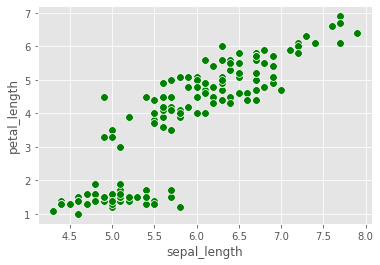

In [11]:
# Visualize data
sns.scatterplot(x='sepal_length', y='petal_length', data=df, s=60, color='green')


In [12]:
# Build the model
x = df [['sepal_length','petal_length']].values

In [13]:
# Import KMeans() class which is in the cluster sub-module in Scikit-learn.
from sklearn.cluster import KMeans

The next step will be to create and train (fit) the model. When using the KMeans() class, the most important hyperparameter that we need to consider is the value of k (number of clusters) which is represented by the n_clusters parameter in the KMeans() class. The algorithm does not learn k by itself. If we set n_clusters=10, the algorithm happily returns 10 clusters and if n_clusters=25, the algorithm happily returns 25 clusters and so on. So, the data scientist’s responsibility is to choose the optimal number of clusters (k).

For this dataset we will take 3 cluster.

In [14]:
# Create the model using KMean class and taking as cluster for this data set 
model = KMeans (n_clusters = 3, random_state = 42)
model

KMeans(n_clusters=3, random_state=42)

In [15]:
# Adapt model to the data 
model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [16]:
# Get cluster centres (centroids)
centroids = model.cluster_centers_
centroids

array([[5.00784314, 1.49411765],
       [5.87413793, 4.39310345],
       [6.83902439, 5.67804878]])

In [17]:
# Assign each data point to cluster index (label)
# From the output, we can see that the 1st data point belongs to cluster 0, the 150th data point belongs to cluster 2 and so on
# We can also use model.predict(x) 
p = model.labels_
p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

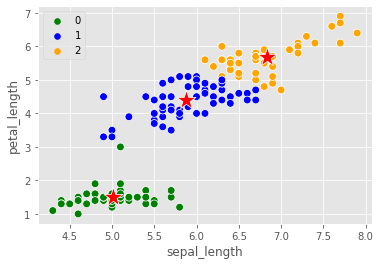

In [18]:
# Visualize the 3 cluster and their centroids marked as a star
sns.scatterplot(x='sepal_length', y='petal_length', data=df, s=60, hue = model.labels_, palette = ['green', 'blue','orange'])
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker = '*', s=400, color = 'red')

#### Clustering Performance Evaluation

Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall of a supervised classification algorithm. In particular any evaluation metric should not take the absolute values of the cluster labels into account but rather if this clustering define separations of the data similar to some ground truth set of classes or satisfying some assumption such that members belong to the same class are more similar than members of different classes according to some similarity metric [27,28].

We have to take in consideration k-means is not a classification tool, therefore analyzing accuracy is not recomended as K-means is not for it. It is supposed to find a grouping of data which maximizes between-clusters distances, it does not use labeling to train.For maximization of accuracy there are other calssifiers as K NeighborsClassifier, logistic regression, SVM, etc.

In the example below we can have the assumption that a prediction belong to a class using Iris Dataset.

In [19]:
# To calculate Accuracy Score for a Cluster
from sklearn.metrics import accuracy_score
y_pred = [3, 5, 4, 2]
y_true = [5, 3, 1, 0]

#In the results below we can see the flower group is the cluster 0 which are green 
accuracy_score(y_true, y_pred, normalize=False)

0

Adjusted Rand Index: Given the knowledge of the ground truth class assignments labels_true and our clustering algorithm assignments of the same samples labels_pred, the adjusted Rand index is a function that measures the similarity of the two assignments, ignoring permutations and with chance normalization.

The perfect score is 1 and a bad record or negative give o or less. Example below of Iris Dataset below: 

In [20]:
# Metrics to measure accuracy: 

from sklearn import metrics
labels_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1]
labels_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

metrics.adjusted_rand_score(labels_true, labels_pred)

0.7121079979749496

Below we can see an example of KNeighborsClassifier using Irish Dataset. This model can be used to make predictions of Iris, and calculating the accuracy using Supervised Learning [23]. 

In Supervised Learning, we have a dataset consisting of both features and labels. The task is to construct an estimator which is able to predict the label of an object given the set of features. A relatively simple example is predicting the species of iris given a set of measurements of its flower.

K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class. As example see below one iris classification problem that output the specie and the accuracy of it.

In [21]:
#Load the irish dataset 
from sklearn import neighbors, datasets

#Assign the data and target to separate variables.
iris = datasets.load_iris()
X, y = iris.data, iris.target

#Split Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5)

#Use classification algorithm to create a empty model. In order to provide the operations to the model we should train them.
# We can train the model with fit function.
from sklearn import neighbors
classifier=neighbors.KNeighborsClassifier()

#Train the model
classifier.fit (x_train,y_train)

#Now is trained you can start making predictions
predictions=classifier.predict(x_test)

#these predictions can be matched with the expected output to measure the accuracy value.
from sklearn.metrics import accuracy_score

In [22]:
print("===Prediction: The iris flower that has 3cm x 5cm sepal and 4cm x 2cm petal is: ===")
print(iris.target_names[classifier.predict([[3, 5, 4, 2]])])
print("\n")
print("===Accuracy: The accuracy score is:===")
print(accuracy_score(y_test,predictions))


===Prediction: The iris flower that has 3cm x 5cm sepal and 4cm x 2cm petal is: ===


NameError: name 'knn' is not defined

### References 

21. Medium - Predicting Irish Flowers -https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee
22. Rukshanpramoditha - K-means clustering - https://rukshanpramoditha.medium.com/k-means-clustering-with-scikit-learn-e2af706450e4
23. Real Python - K-Means Clustering - https://realpython.com/k-means-clustering-python/
24. Medium - Machine Learning Iris - https://medium.com/@jebaseelanravi96/machine-learning-iris-classification-33aa18a4a983
25. Scipy - Lectures - http://scipy-lectures.org/packages/scikit-learn/index.html
26. Scikit-learn - Metrics Accuracy - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
27. Scikit-learn - Clustering Metrics - https://scikit-learn.org/stable/modules/classes.html#clustering-metrics
28. Scikit-learn - Clustering Performance - https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation![image.png](attachment:image.png)